## Import the libraries

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import the dataset and replace missing values with nan

In [86]:
dataset = pd.read_csv('crx.csv', header = None)
dataset.replace(['?'], np.nan, inplace = True)
#print(dataset)

## Change datatype of columns with numbers and check which columns have nan values

In [87]:
#dataset.astype({[1,2]: 'float32'}).dtypes
dataset.loc[:,[1,2,7,10,13,14]] = dataset.loc[:,[1,2,7,10,13,14]].apply(pd.to_numeric)
print(dataset.dtypes.values)
print(dataset.isnull().sum().values)
#dataset.isnull().any()

[dtype('O') dtype('float64') dtype('float64') dtype('O') dtype('O')
 dtype('O') dtype('O') dtype('float64') dtype('O') dtype('O')
 dtype('int64') dtype('O') dtype('O') dtype('float64') dtype('int64')
 dtype('O')]
[12 12  0  6  6  9  9  0  0  0  0  0  0 13  0  0]


<AxesSubplot:xlabel='15', ylabel='Count'>

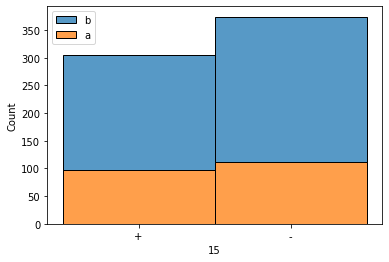

In [88]:
sns.histplot(dataset, x=dataset[15] ,hue = dataset[0] , stat="count", 
             multiple = "stack")

## Separate features and target variable

In [89]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Take care of missing data

In [90]:
from sklearn.impute import SimpleImputer

# replace missing numerical data with mean strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, [1,13]])
X[:,[1,13]] = imputer.transform(X[:, [1,13]])

# replace cathegorical data with mod strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, [0,3,4,5,6]])
X[:,[0,3,4,5,6]] = imputer.transform(X[:, [0,3,4,5,6]])

print(X)


[['b' 30.83 0.0 ... 'g' 202.0 0]
 ['a' 58.67 4.46 ... 'g' 43.0 560]
 ['a' 24.5 0.5 ... 'g' 280.0 824]
 ...
 ['a' 25.25 13.5 ... 'g' 200.0 1]
 ['b' 17.92 0.205 ... 'g' 280.0 750]
 ['b' 35.0 3.375 ... 'g' 0.0 0]]


## Encode categorical data

### Encode the Independent Variable

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,3,4,5,6,8,9,11,12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(np.shape(X))

(690, 46)


### Encode the Dependent Variable

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [93]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 

## Split the dataset into the Training set and Test set

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [95]:
#print(X_test)

In [96]:
#print(y_train)

In [97]:
#print(y_test)

## Apply RandomForestClassifier to Training dataset

In [98]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

## Predict values 

In [99]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Make confusion matrix

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy is:', accuracy_score(y_test, y_pred))
print('Precision is:', precision_score(y_test, y_pred))
print('Recall is:', recall_score(y_test, y_pred))

[[56  7]
 [ 8 67]]
Accuracy is: 0.8913043478260869
Precision is: 0.9054054054054054
Recall is: 0.8933333333333333


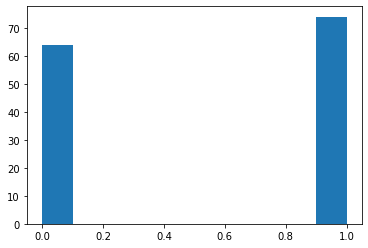

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 75.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

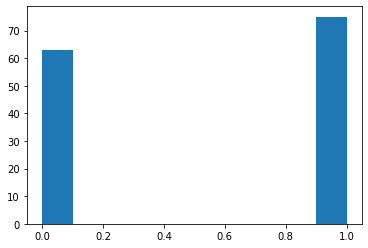

In [101]:
# interesting that the total number of positive and negative outcomes is nearly same for true and predicted values
plt.hist(y_pred)
plt.show()
plt.hist(y_test)